Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> "Improve" comments mean that there are tiny corrections that could help you to make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* Thank you for sending your project. You've done a really good job on it! It was interesting to check. 
* The code style is very good. I was really surprised!
* Glad to see that notebook is well-structured.
* It would be better if markers and **bold font** were used in conclusions and comments. Anyway, the findings were informative and interesting to read.
* Please name the plots and axes next time. You can use 'plt.title()', 'plt.xlabel()' and 'plt.ylabel()' for it.
* I've left some comments which could help you to improve your project and further develop your skills.
* You've mastered the hypothesis testing technique. Congratulations!
* Your project has been accepted and now you can move on to the next sprint.
* Keep up the good work, and good luck on the next sprint!

# Exploratory data analysis
In addition to the data you retrieved in the previous tasks, you've been given a second file. You now have these two CSVs:

/datasets/project_sql_result_01.csv.

It contains the following data:

company_name: taxi company name

trips_amount: the number of rides for each taxi company on November 15-16, 2017.

/datasets/project_sql_result_04.csv.
It contains the following data:

dropoff_location_name: Chicago neighborhoods where rides ended

average_trips: the average number of rides that ended in each neighborhood in November 2017.



In [56]:
#First we need to import the relevant libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
<b>Success:</b> Thank you for collecting all imports in the first cell!
</div>

In [57]:
#Next, we import the csv files into variables
df1 = pd.read_csv('https://code.s3.yandex.net/datasets/project_sql_result_01.csv')
df2 = pd.read_csv('https://code.s3.yandex.net/datasets/project_sql_result_04.csv')

In [58]:
#Lets look at some general information about the dataframes
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [59]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [60]:
#Let's also check if there are any NA values
df1.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [61]:
df2.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

<div class="alert alert-block alert-success">
<b>Success:</b> Data loading and initial analysis were done correctly.
</div>

The dataframes look okay and there are no NA values, we can proceed onto slicing the data for the relevant graphs required.

In [62]:
#Let's first sort the average trips and pick the 10 highest locations.
top_10_drop = df2.sort_values("average_trips",ascending=False).head(10)
top_10_drop

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<div class="alert alert-block alert-info">
<b>Improve: </b> In general it's OK but it would be better to use ".nlargest()" method in this case.
</div>

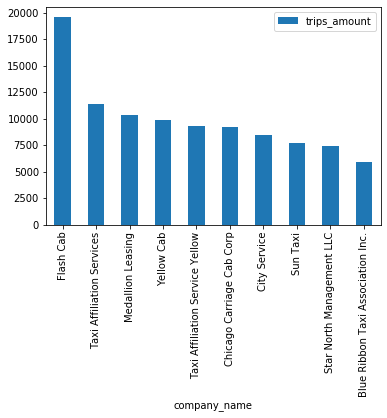

In [63]:
#Let's first sort the most trips and pick the 10 highest companies.
top_10_comp = df1.sort_values('trips_amount',ascending=False).head(10)
top_10_comp
#Now we can make a bar plot of the companies with the most number of trips made
top_10_comp.plot(kind='bar', y= "trips_amount", x ="company_name")


For November 15-16, 2017, we see that Flash Cab has the highest market share, almost 20%, and Blue Ribbon Taxi has the 10th highest with 6% of the market share.

<div class="alert alert-block alert-info">
<b>Improve: </b> It would be better if you've visualized all taxi companies here.
</div>

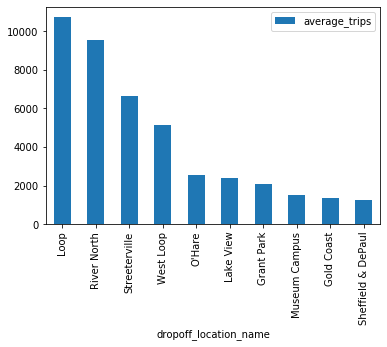

In [64]:
top_10_drop.plot(kind='bar', y= "average_trips", x ="dropoff_location_name")

We can similarly see which neighborhoods had the most number of average trips that ended there  in November 2017. Loop is the highest  with about 25%

<div class="alert alert-block alert-success">
<b>Success:</b> In general this step was done well. Good job!
</div>

In [65]:
#Let's import the last dataset for the hypothesis test
df3 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [66]:
df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [67]:
#Let's convert the start_ts column to datetime format so it makes the filtering easier for us.
df3["start_ts"] = pd.to_datetime(df3["start_ts"])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


# Hypothesis test
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [68]:
#Now we just have to make two data slices with the data of rainy and non-rainy saturdays
rain = df3[(df3["start_ts"].dt.weekday==5)&(df3["weather_conditions"]!="Good")]["duration_seconds"].values

In [69]:
no_rain = df3[(df3["start_ts"].dt.weekday==5)&(df3["weather_conditions"]=="Good")]["duration_seconds"].values

In [77]:
#We can conduct the hypothesis test as below.
alpha = 0.05
test = stats.ttest_ind(rain, no_rain)
print('p value:', test.pvalue)

if (test.pvalue < alpha):
    print("The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")
else:
    print("The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.")

p value: 6.517970327099473e-12
The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


<div class="alert alert-block alert-info">
<b>Improve: </b> Please check and compare variances of each group before testing and set "equal_var" parameter in "stats.ttest_ind" next time.
</div>

We go with the null hypothesis that 'The average duration of rides from the Loop to O'Hare International Airport does not change' and the alternative hypothesis that 'The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.' Since we have a pretty big sample size and are trying to make an inference on a huge population, the alpha level can be set as per the requirements of the company. But since the p-value is so tiny, no matter what we set the alpha value (unless it's smaller than the p-value which is almost meaninglessly small in this case), we will be able to confidently reject the null hypothesis.

<div class="alert alert-block alert-success">
<b>Success:</b> Both null and alternative hypotheses were formulated correctly. Testing was done in the right way too.
</div>